In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as line

In [2]:
# Dataset for testing the code before having the data
index_scen1 = np.random.random((2, 2)).tolist()
index_scen2 = np.random.random((2, 2)).tolist()

# Make dataset from input format (2 2D np.array's, one for each future time period, with dims: models, scenarios)
model_names = ['CanESM5', 'CAMS-CSM1-0']
scenario_names = ['ssp119', 'ssp260']
index = [index_scen1,index_scen2]
dset = xr.Dataset(data_vars = dict(
                  index = (['time_period', 'scenario', 'model'], index)),
                  coords = dict(time_period = ['2041-2060', '2081-2100'],
                                scenario = scenario_names,
                                model = model_names))

In [3]:
symbols = ['^', 'o']
#symbols = ['v', '^', 'o', 's', '*'^

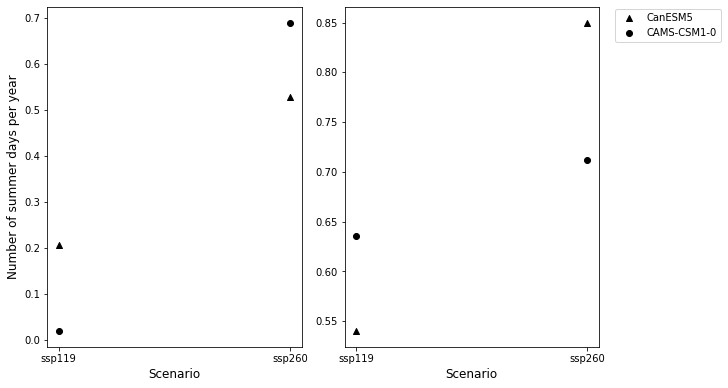

In [4]:
# Initialize figure
fig = plt.figure(constrained_layout = True, figsize=(10, 10))
# Plot
ax = fig.add_subplot(221)   #top left for future1
for model, symbol in zip(model_names, symbols):
    ax.scatter(dset.scenario, dset.to_array().sel(time_period = '2041-2060').sel(model = model), color = 'black', marker = symbol, label = model)
    plt.xticks()
    plt.xlabel('Scenario', fontsize = 12)
    plt.ylabel('Number of summer days per year', fontsize = 12)
ax = fig.add_subplot(222)   #top right for future2
for model, symbol in zip(model_names, symbols):
    ax.scatter(dset.scenario, dset.to_array().sel(time_period = '2081-2100').sel(model = model), color = 'black', marker = symbol, label = model)
    plt.xlabel('Scenario', fontsize = 12)
    plt.legend(bbox_to_anchor = (1.5, 1.01), loc = 'upper right')

In [5]:
# Dataset for testing the code before having the data
index_scen1 = np.random.random((2, 2, 41, 41, 30)).tolist()
index_scen2 = np.random.random((2, 2, 41, 41, 30)).tolist()

# Make dataset from input format (2 5D np.array's, one for each future time period, with dims: lat, lon, time, models, scenarios)
model_names = ['CanESM5', 'CAMS-CSM1-0']
scenario_names = ['ssp119', 'ssp260']
lat = np.linspace(25, 45, 41).tolist()
lon = np.linspace(15, 35, 41).tolist()
time = [('{:02d}-01-2041').format(x) for x in range(1, 31)]
index = [index_scen1,index_scen2]

In [6]:
dset = xr.Dataset(data_vars = dict(
                  index = (['time_period', 'scenario', 'model', 'lat', 'lon', 'time'], index)),
                  coords = dict(time_period = ['2041-2060', '2081-2100'],
                                scenario = scenario_names,
                                model = model_names,
                                lat = lat,
                                lon = lon,
                                time = time))

/tmp/ipykernel_3148032/742192456.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dset_time_series.time.values, rotation = 45)
/tmp/ipykernel_3148032/742192456.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dset_time_series.time.values, rotation = 45)
/tmp/ipykernel_3148032/742192456.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dset_time_series.time.values, rotation = 45)
/tmp/ipykernel_3148032/742192456.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dset_time_series.time.values, rotation = 45)
/tmp/ipykernel_3148032/742192456.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dset_time_series.time.values, rotation = 45)
/tmp/ipykernel_3148032/742192456.py:15: UserWarning: FixedFormatter should only be used to

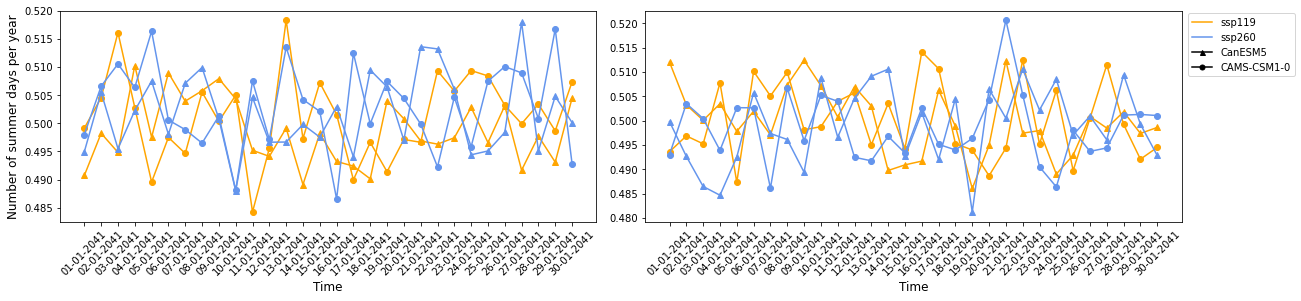

In [19]:
# Time series plot
## Take lat-lon mean
dset_time_series = dset.mean(dim = 'lat').mean(dim = 'lon')
# Initialize figure
fig = plt.figure(constrained_layout = True, figsize = (18, 7))
ax1 = fig.add_subplot(221)   #top left for future1
plt.ylabel('Number of summer days per year', fontsize = 12)
ax2 = fig.add_subplot(222)   #top right for future2
# Plot
colors = ['orange', 'cornflowerblue']
#colors = ['orange', 'cornflowerblue', 'plumb', 'turquoise', 'indianred', 'olive']
for scenario, color in zip(scenario_names, colors):
    for model, symbol in zip(model_names, symbols):
        ax1.plot(dset_time_series.time, dset_time_series.sel(scenario = scenario).sel(time_period = '2041-2060').sel(model = model).to_array().values.ravel(), marker = symbol, color = color)
        ax1.set_xticklabels(dset_time_series.time.values, rotation = 45)
        ax1.set_xlabel('Time', fontsize = 12)        
    for model, symbol in zip(model_names, symbols):
        ax2.plot(dset_time_series.time, dset_time_series.sel(scenario = scenario).sel(time_period = '2081-2100').sel(model = model).to_array().values.ravel(), marker = symbol, color = color)
        ax2.set_xticklabels(dset_time_series.time.values, rotation = 45)
        ax2.set_xlabel('Time', fontsize = 12)

# Custom legend
leg1 = [Line2D([0], [0], color = colors[i], label = scenario_names[i], markersize = 5) for i in range(len(scenario_names))]
leg2 = [Line2D([0], [0], marker = symbols[j], color = 'black', label = model_names[j], markersize = 5) for j in range(len(model_names))]
leg = np.array([leg1,leg2]).flatten().tolist()
plt.legend(handles = leg, bbox_to_anchor = (1.22, 1.01), loc = 'upper right')